In [ ]:
# Probability Distributions

#we first import libraries and load the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
files.upload()


Saving bmi.csv to bmi.csv


{'bmi.csv': b'Age,Height,Weight,Bmi,BmiClass\n61,1.85,109.3,31.935719503287068,Obese Class 1\n60,1.71,79.02,27.02369959987689,Overweight\n60,1.55,74.7,31.09261186264308,Obese Class 1\n60,1.46,35.9,16.841808969787955,Underweight\n60,1.58,97.1,38.89601025476686,Obese Class 2\n59,1.71,79.32,27.126295270339593,Overweight\n59,1.7,73.32,25.370242214532873,Overweight\n59,1.72,85.32,28.83991346673878,Overweight\n59,1.46,36.0,16.88872208669544,Underweight\n59,1.83,104.7,31.26399713338708,Obese Class 1\n58,1.71,79.31,27.122875414657504,Overweight\n58,1.7,73.41,25.401384083044984,Overweight\n58,1.72,85.21,28.80273120605733,Overweight\n58,1.47,36.0,16.65972511453561,Underweight\n57,1.71,79.3,27.119455558975414,Overweight\n57,1.7,73.5,25.432525951557096,Overweight\n57,1.72,85.1,28.76554894537588,Overweight\n57,1.75,110.0,35.91836734693877,Obese Class 2\n57,1.58,79.7,31.925973401698442,Obese Class 1\n57,1.47,36.0,16.65972511453561,Underweight\n57,1.6,99.1,38.71093749999999,Obese Class 2\n56,1.71,79.

In [ ]:
df = pd.read_csv('bmi.csv')
print(df.head())

   Age  Height  Weight        Bmi       BmiClass
0   61    1.85  109.30  31.935720  Obese Class 1
1   60    1.71   79.02  27.023700     Overweight
2   60    1.55   74.70  31.092612  Obese Class 1
3   60    1.46   35.90  16.841809    Underweight
4   60    1.58   97.10  38.896010  Obese Class 2


In [ ]:
# Filtering by age in order to keep those with the age of 21+
filtered_df = df[df['Age'] >= 21].copy()
x_data = filtered_df['Height'].values
y_data = filtered_df['Weight'].values

def calculate_stats(data):
    n = len(data)
    mean = sum(data) / n
    # Variance formula: sum((x - mean)^2) / n
    variance = sum((x - mean) ** 2 for x in data) / n
    std_dev = variance ** 0.5
    return mean, std_dev

mu_x, sig_x = calculate_stats(x_data)
mu_y, sig_y = calculate_stats(y_data)

In [ ]:
n = len(x_data)
covariance = sum((x_data[i] - mu_x) * (y_data[i] - mu_y) for i in range(n)) / n
rho = covariance / (sig_x * sig_y)

print(f"Calculated Stats:\nHeight Mean: {mu_x:.2f}, SD: {sig_x:.2f}")
print(f"Weight Mean: {mu_y:.2f}, SD: {sig_y:.2f}")
print(f"Correlation (Rho): {rho:.4f}")

Calculated Stats:
Height Mean: 1.73, SD: 0.08
Weight Mean: 82.24, SD: 32.44
Correlation (Rho): 0.5478


In [ ]:
def bivariate_normal_pdf(x, y, mx, my, sx, sy, r):
    # Part 1: The coefficient (the part before the 'e')
    coeff = 1 / (2 * np.pi * sx * sy * np.sqrt(1 - r**2))

    # Part 2: The exponent
    zx = (x - mx) / sx
    zy = (y - my) / sy
    inner_bracket = (zx**2 + zy**2 - (2 * r * zx * zy))
    exponent = -1 / (2 * (1 - r**2)) * inner_bracket

    return coeff * np.exp(exponent)

# Create a coordinate grid for plotting
# We create a range around the means (e.g., 3 standard deviations out)
x_range = np.linspace(mu_x - 3*sig_x, mu_x + 3*sig_x, 100)
y_range = np.linspace(mu_y - 3*sig_y, mu_y + 3*sig_y, 100)
X, Y = np.meshgrid(x_range, y_range)

# Apply the PDF function to the grid
Z = bivariate_normal_pdf(X, Y, mu_x, mu_y, sig_x, sig_y, rho)

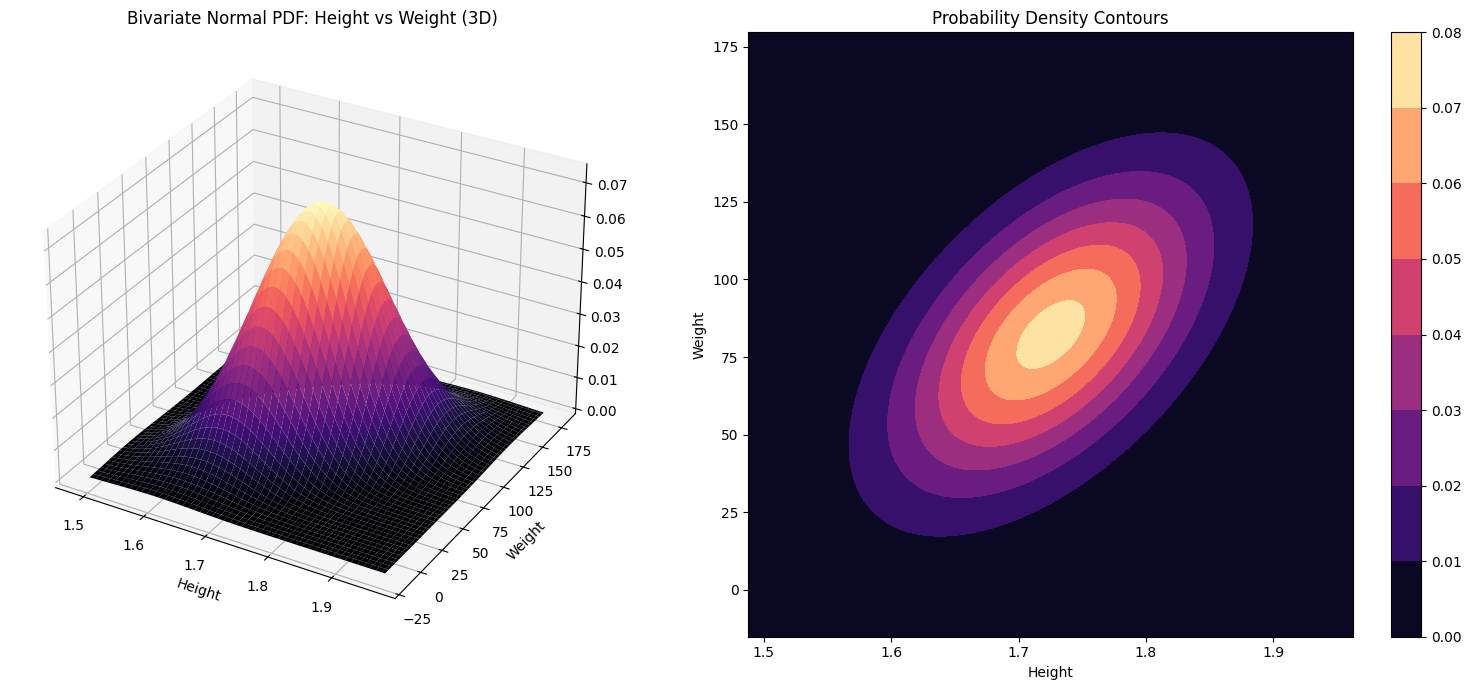

In [ ]:

# --- STEP 4: VISUALIZATION ---
fig = plt.figure(figsize=(16, 7))

# Plot 1: 3D Surface
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(X, Y, Z, cmap='magma', edgecolor='none')
ax1.set_title('Bivariate Normal PDF: Height vs Weight (3D)')
ax1.set_xlabel('Height')
ax1.set_ylabel('Weight')

# Plot 2: Contour Plot
ax2 = fig.add_subplot(122)
cp = ax2.contourf(X, Y, Z, cmap='magma')
plt.colorbar(cp)
ax2.set_title('Probability Density Contours')
ax2.set_xlabel('Height')
ax2.set_ylabel('Weight')

plt.tight_layout()
plt.show()